In [22]:
import numpy as np
import pandas as pd 

import pandas_datareader.data as web

# настройки визуализации
import matplotlib.pyplot as plt

# Не показывать Warnings
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [29]:
m2 = web.DataReader(name='M2', data_source='fred', start='1990-1')
m2

,M2
DATE,
1990-01-01,3161.1
1990-01-08,3164.1
1990-01-15,3164.4
1990-01-22,3166.4
1990-01-29,3167.6
...,...
2021-01-04,19039.3
2021-01-11,19408.5
2021-01-18,19420.5


In [28]:
m2.index = m2.index.to_period(freq='M')
m2

,M2
DATE,
1990-01,3161.1
1990-01,3164.1
1990-01,3164.4
1990-01,3166.4
1990-01,3167.6
...,...
2021-01,19039.3
2021-01,19408.5
2021-01,19420.5


<Axes: xlabel='DATE'>

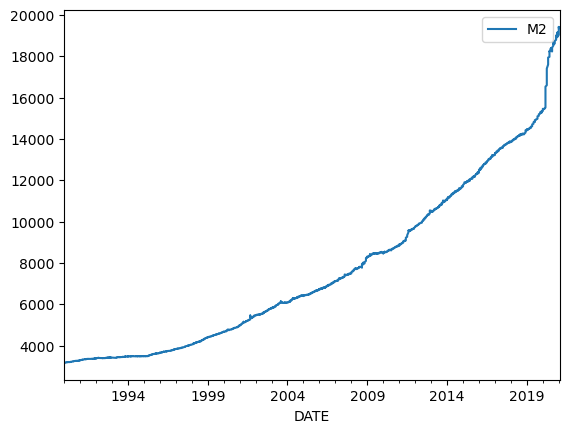

In [4]:
m2.plot()

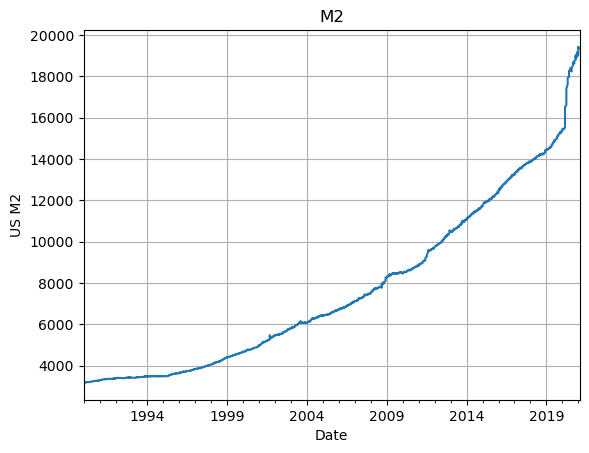

In [5]:
ax = m2.plot(title='M2')
# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('US M2')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

In [30]:
y = np.log(m2)

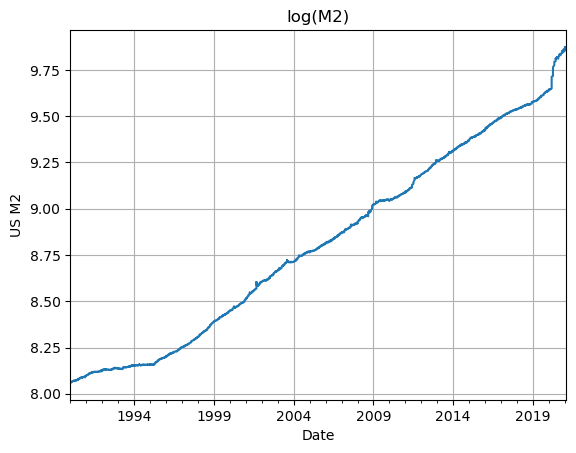

In [7]:
ax = y.plot(title='log(M2)')
# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('US M2')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

In [8]:
y.diff()

,M2
DATE,
1990-01,NaN
1990-01,0.000949
1990-01,0.000095
1990-01,0.000632
1990-01,0.000379
...,...
2021-01,0.005493
2021-01,0.019206
2021-01,0.000618


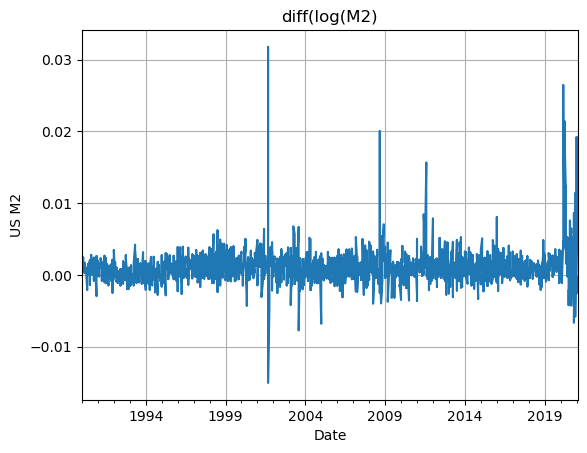

In [10]:
ax = y.diff().plot(title='diff(log(M2)')
# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('US M2')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

In [11]:
y.diff().diff()

,M2
DATE,
1990-01,NaN
1990-01,NaN
1990-01,-0.000854
1990-01,0.000537
1990-01,-0.000253
...,...
2021-01,0.011338
2021-01,0.013713
2021-01,-0.018588


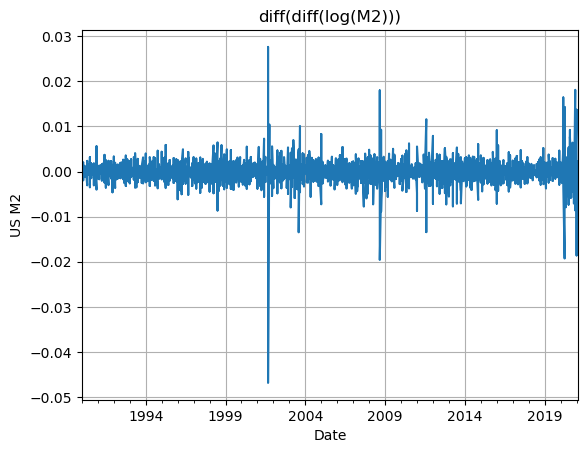

In [12]:
ax = y.diff().diff().plot(title='diff(diff(log(M2)))')
# надпись по ос oX
ax.set_xlabel('Date')
# надпись по ос oY
ax.set_ylabel('US M2')
# отобразить сетку
ax.grid()
# удалим легенду
ax.legend().remove()

plt.show()

In [13]:
def getWeights(d,lags):
    # return the weights from the series expansion of the differencing operator
    # for real orders d and up to lags coefficients
    w=[1]
    for k in range(1,lags):
        w.append(-w[-1]*((d-k+1))/k)
    w=np.array(w).reshape(-1,1) 
    return w
def plotWeights(dRange, lags, numberPlots):
    weights=pd.DataFrame(np.zeros((lags, numberPlots)))
    interval=np.linspace(dRange[0],dRange[1],numberPlots)
    for i, diff_order in enumerate(interval):
        weights[i]=getWeights(diff_order,lags)
    weights.columns = [round(x,2) for x in interval]
    fig=weights.plot(figsize=(15,6))
    plt.legend(title='Order of differencing')
    plt.title('Lag coefficients for various orders of differencing')
    plt.xlabel('lag coefficients')
    #plt.grid(False)
    plt.show()
def ts_differencing(series, order, lag_cutoff):
    # return the time series resulting from (fractional) differencing
    # for real orders order up to lag_cutoff coefficients
    
    weights=getWeights(order, lag_cutoff)
    res=0
    for k in range(lag_cutoff):
        res += weights[k]*series.shift(k).fillna(0)
    return res[lag_cutoff:] 

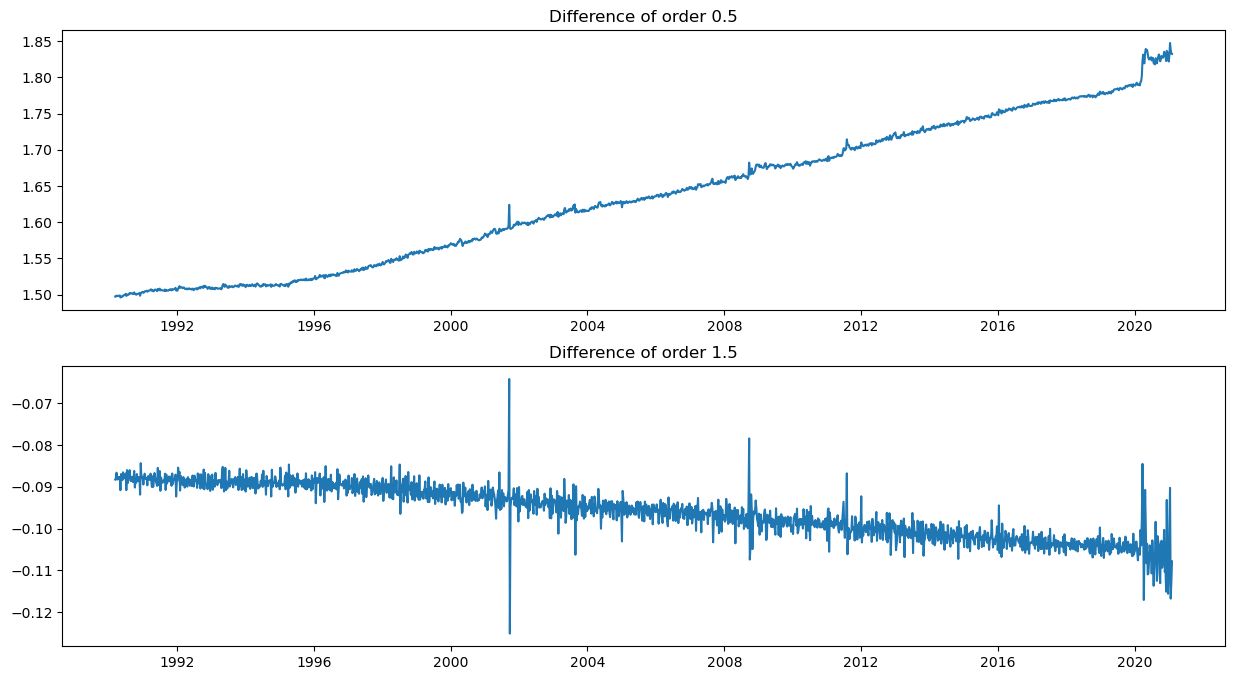

In [31]:
differences=[0.5, 1.5]
win_size = 10

# исходный ряд
fig, axs = plt.subplots(len(differences),1,figsize=(15,4*len(differences)))

for i in range(len(differences)):
	axs[i].plot(ts_differencing(y, differences[i], win_size))
	axs[i].set_title(f'Difference of order {differences[i]}')

plt.show()